In [1]:
import matplotlib.pyplot as plt
import scvelo as scv
import scanpy as sc
import cellrank as cr

#d
# set verbosity levels
cr.settings.verbosity = 2
scv.settings.verbosity = 3

# figure settings
scv.settings.set_figure_params(
    "scvelo", dpi_save=400, dpi=80, transparent=True, fontsize=20, color_map="viridis"
)
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np


2023-06-21 22:23:59.663159: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-21 22:23:59.663263: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-06-21 22:23:59.663272: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [2]:
sc.settings.figdir="/home/gilberthan/Desktop/disk1/limb/3.9_wt_integrate/result/6.21_traj_hm/"
scv.settings.figdir="/home/gilberthan/Desktop/disk1/limb/3.9_wt_integrate/result/6.21_traj_hm/"
cr.settings.figdir="/home/gilberthan/Desktop/disk1/limb/3.9_wt_integrate/result/6.21_traj_hm/"

In [3]:
adata_sub=sc.read("../../important_processed_data/6.18_dpt_wt_sub.h5ad")

In [5]:
sc.pp.neighbors(adata_sub,use_rep="X_scANVI")

In [4]:
adata_sub

AnnData object with n_obs × n_vars = 166144 × 62934
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'le

In [6]:
adata_sub.obs["dpt_norm_reverse"]=1-adata_sub.obs["dpt_norm"]

In [7]:
vk=cr.kernels.PseudotimeKernel(adata_sub, time_key = 'dpt_norm_reverse')

In [8]:
vk

PseudotimeKernel[n=166144]

In [9]:
vk.compute_transition_matrix(threshold_scheme="soft", nu=0.5)

Computing transition matrix based on pseudotime`


  0%|          | 0/166144 [00:00<?, ?cell/s]

    Finish (0:01:06)


PseudotimeKernel[n=166144, dnorm=False, scheme='soft', b=10.0, nu=0.5]

In [13]:
vk

PseudotimeKernel[n=166144, dnorm=False, scheme='soft', b=10.0, nu=0.5]

In [27]:
from cellrank.estimators import GPCCA

g_fwd = GPCCA(vk)
print(g_fwd)

GPCCA[kernel=PseudotimeKernel[n=166144], terminal_states=None, macrostates=None]


Computing Schur decomposition
Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:21)


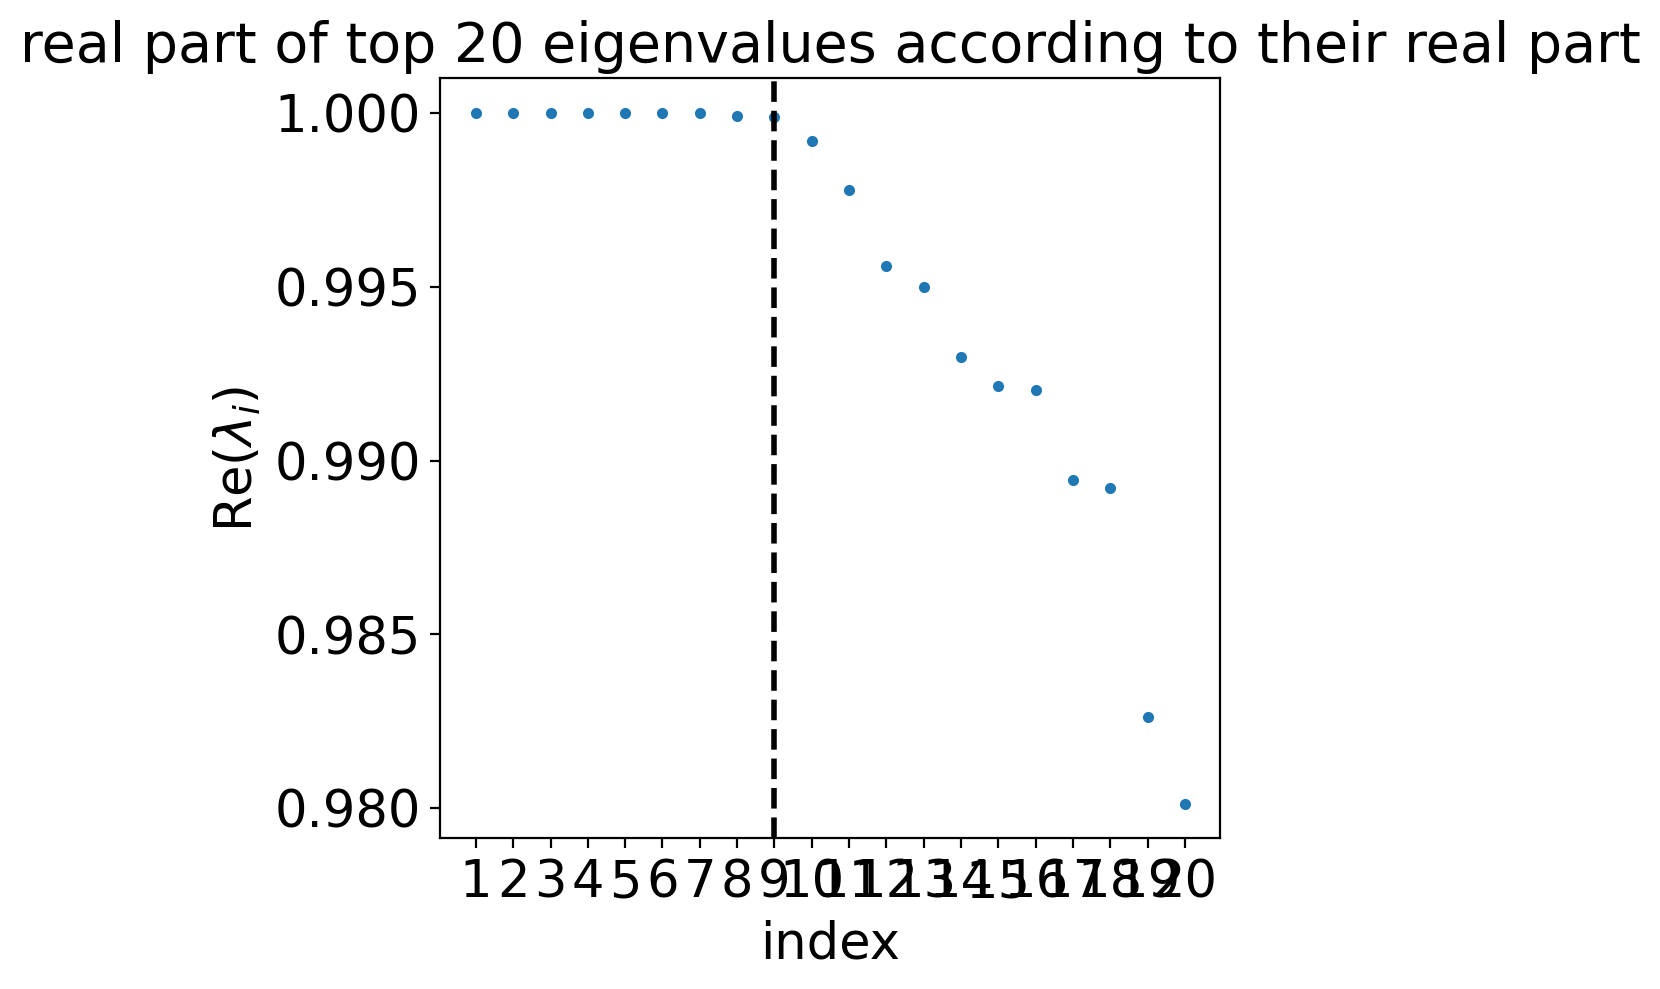

In [28]:
g_fwd.compute_schur(n_components=20)
g_fwd.plot_spectrum(real_only=True)

Computing `9` macrostates
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:06:49)


/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


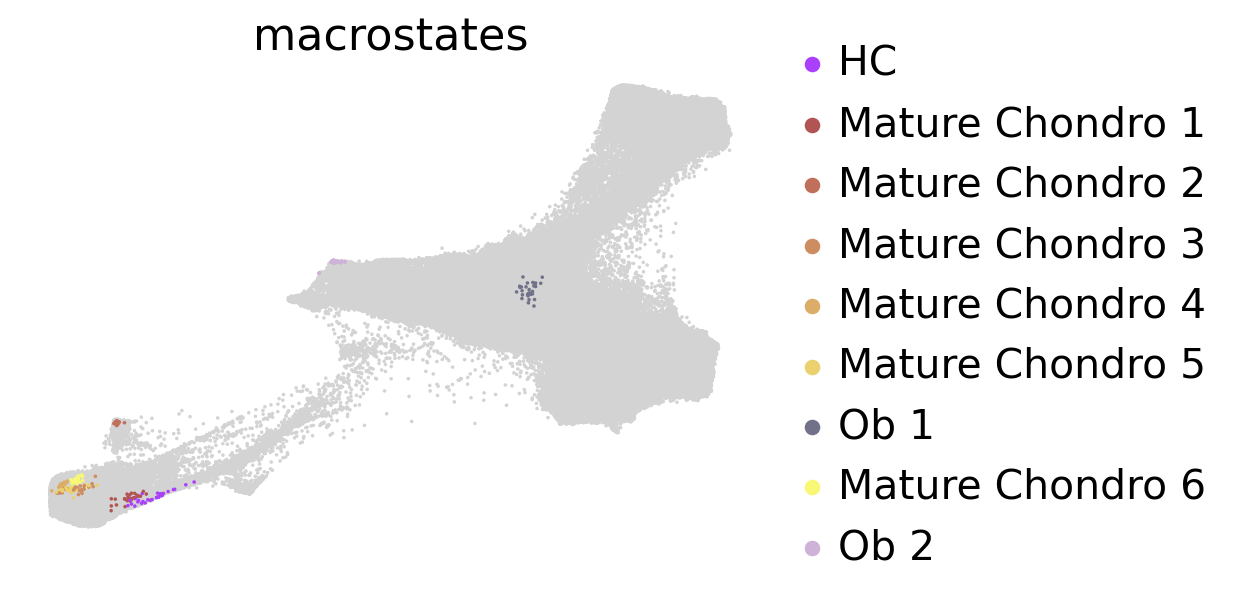

In [29]:
g_fwd.compute_macrostates(n_states=9, cluster_key="C19_named")
g_fwd.plot_macrostates(discrete=True, basis="draw_graph_fa", legend_loc="right")

Using precomputed projection `adata.obsm['T_fwd_draw_graph_fa']`
saving figure to file /home/gilberthan/Desktop/disk1/limb/3.9_wt_integrate/result/6.21_traj_hm/scvelo_plot_projection.pdf


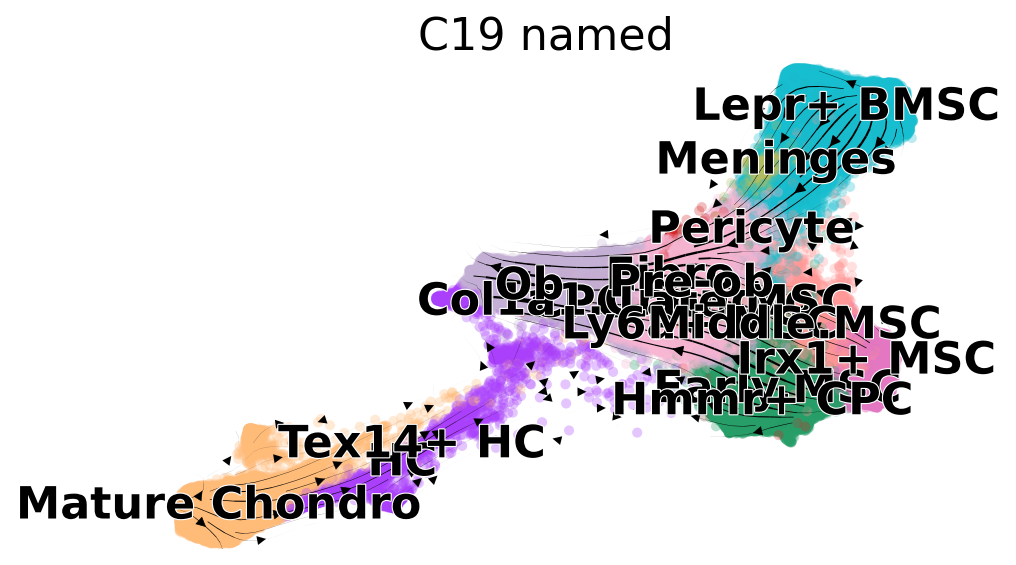

In [31]:
vk.plot_projection(basis="draw_graph_fa",color="C19_named",save="plot_projection")

Using precomputed projection `adata.obsm['T_fwd_draw_graph_fa']`
saving figure to file /home/gilberthan/Desktop/disk1/limb/3.9_wt_integrate/result/6.21_traj_hm/scvelo_plot_projection_C7.pdf


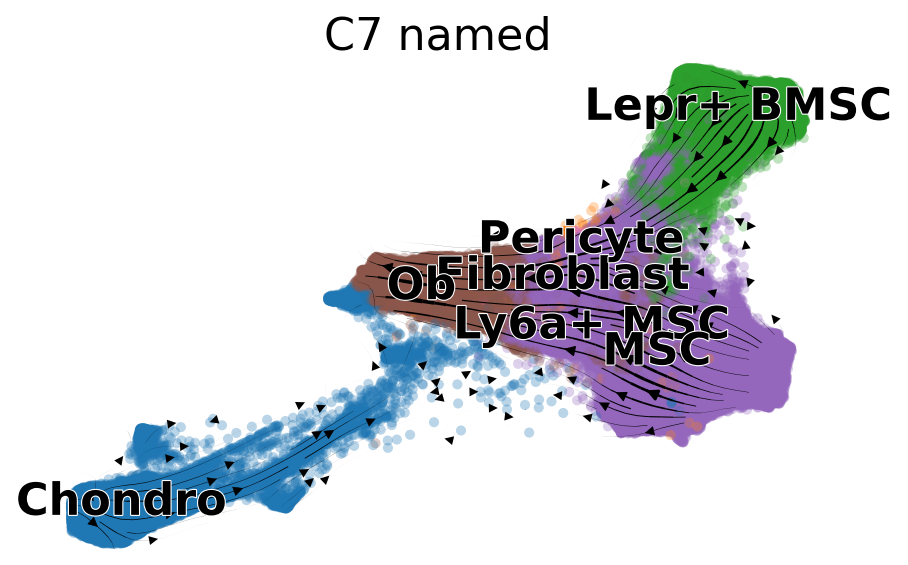

In [32]:
vk.plot_projection(basis="draw_graph_fa",color="C7_named",save="plot_projection_C7")

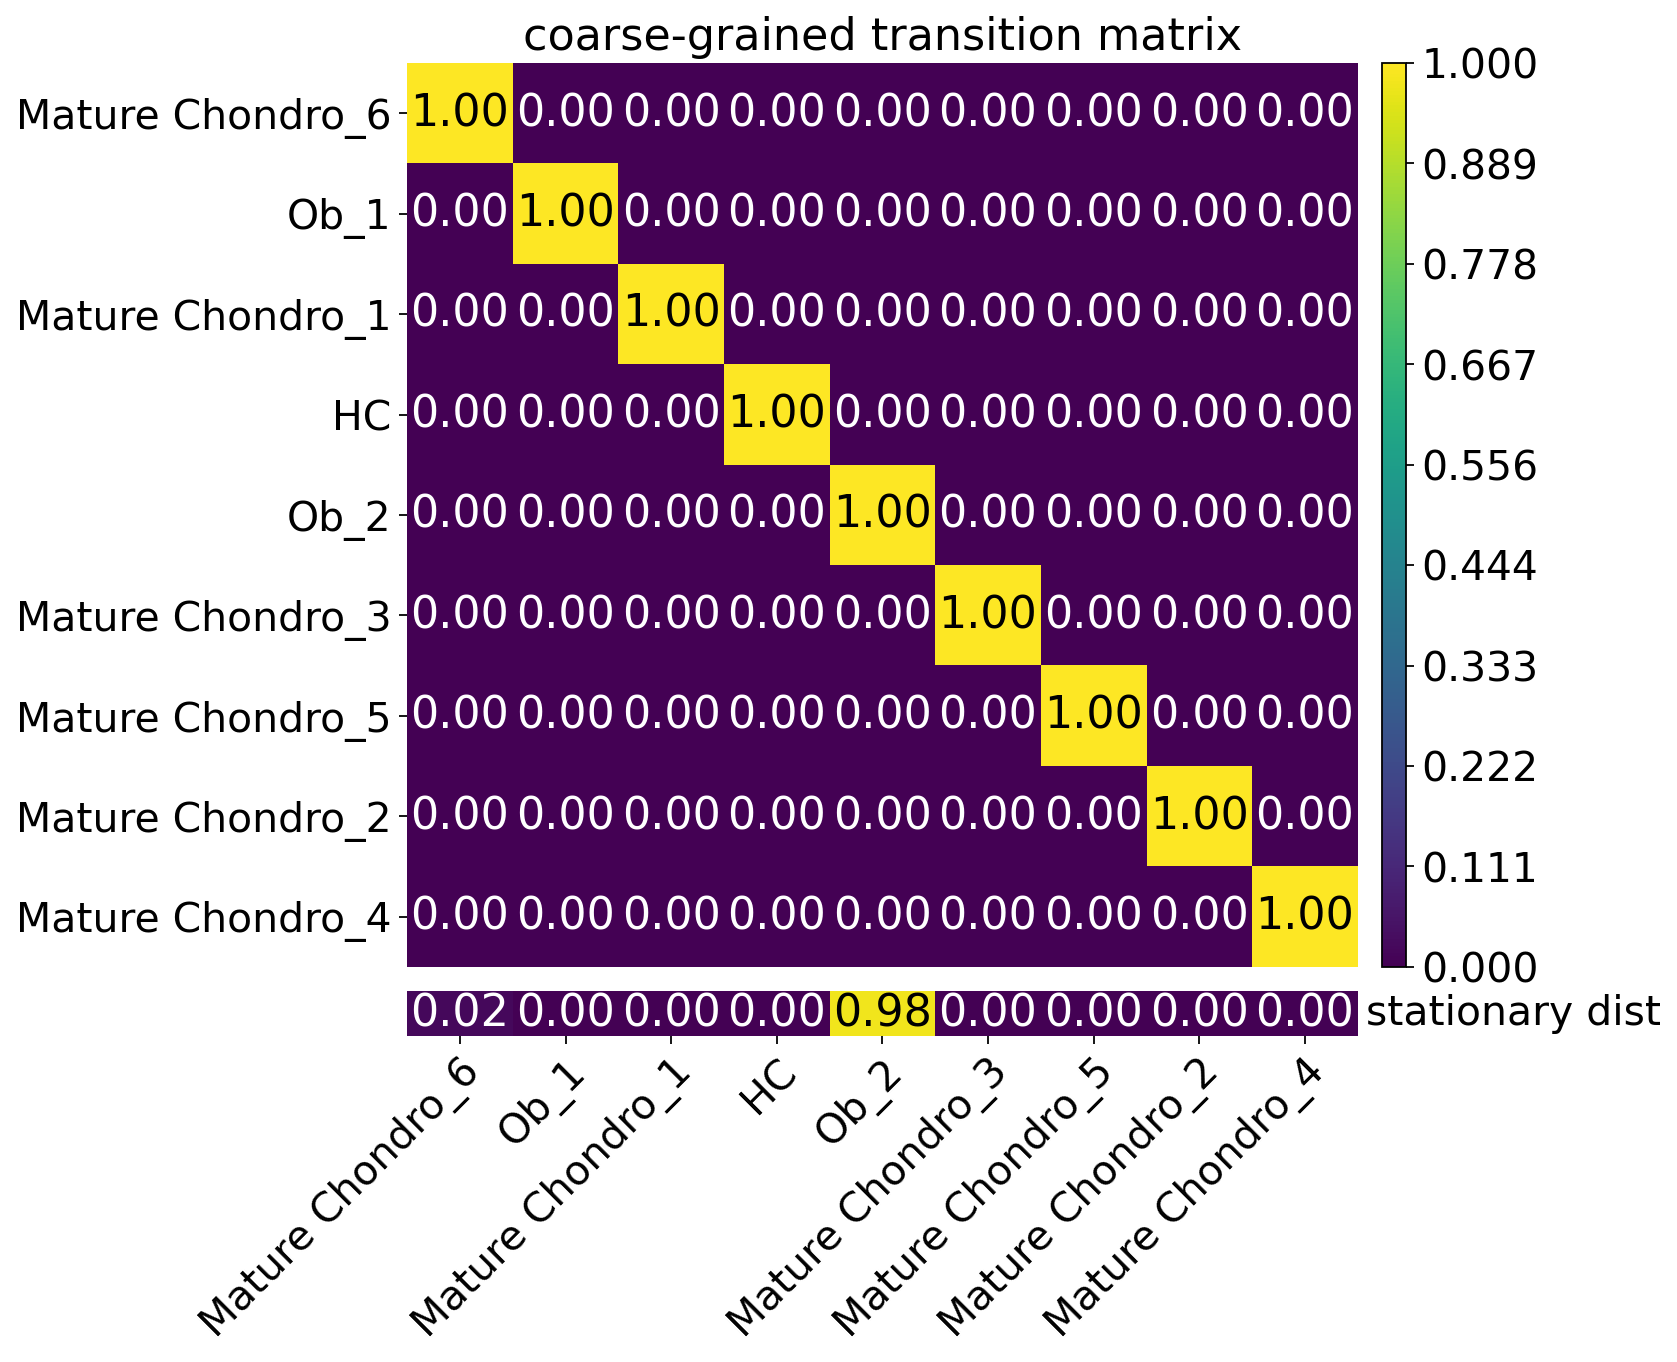

In [33]:
g_fwd.plot_coarse_T()

In [35]:
g_fwd.set_terminal_states_from_macrostates(["Ob_2"])

Adding `adata.obs['terminal_states']`
       `adata.obs['terminal_states_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


GPCCA[kernel=PseudotimeKernel[n=166144], terminal_states=['Ob_2'], macrostates=['HC', 'Mature Chondro_1', 'Mature Chondro_2', 'Mature Chondro_3', 'Mature Chondro_4', 'Mature Chondro_5', 'Mature Chondro_6', 'Ob_1', 'Ob_2']]

In [40]:
g_fwd.compute_absorption_probabilities( use_petsc=True, tol=1e-10,preconditioner="ilu")


Computing absorption probabilities


  0%|          | 0/1 [00:00<?, ?/s]

Adding `adata.obsm['to_terminal_states']`
       `.absorption_probabilities`
    Finish (0:04:48)


/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The dra

saving figure to file /home/gilberthan/Desktop/disk1/limb/3.9_wt_integrate/result/6.21_traj_hm/scvelo_pseduotime_absorption.pdf


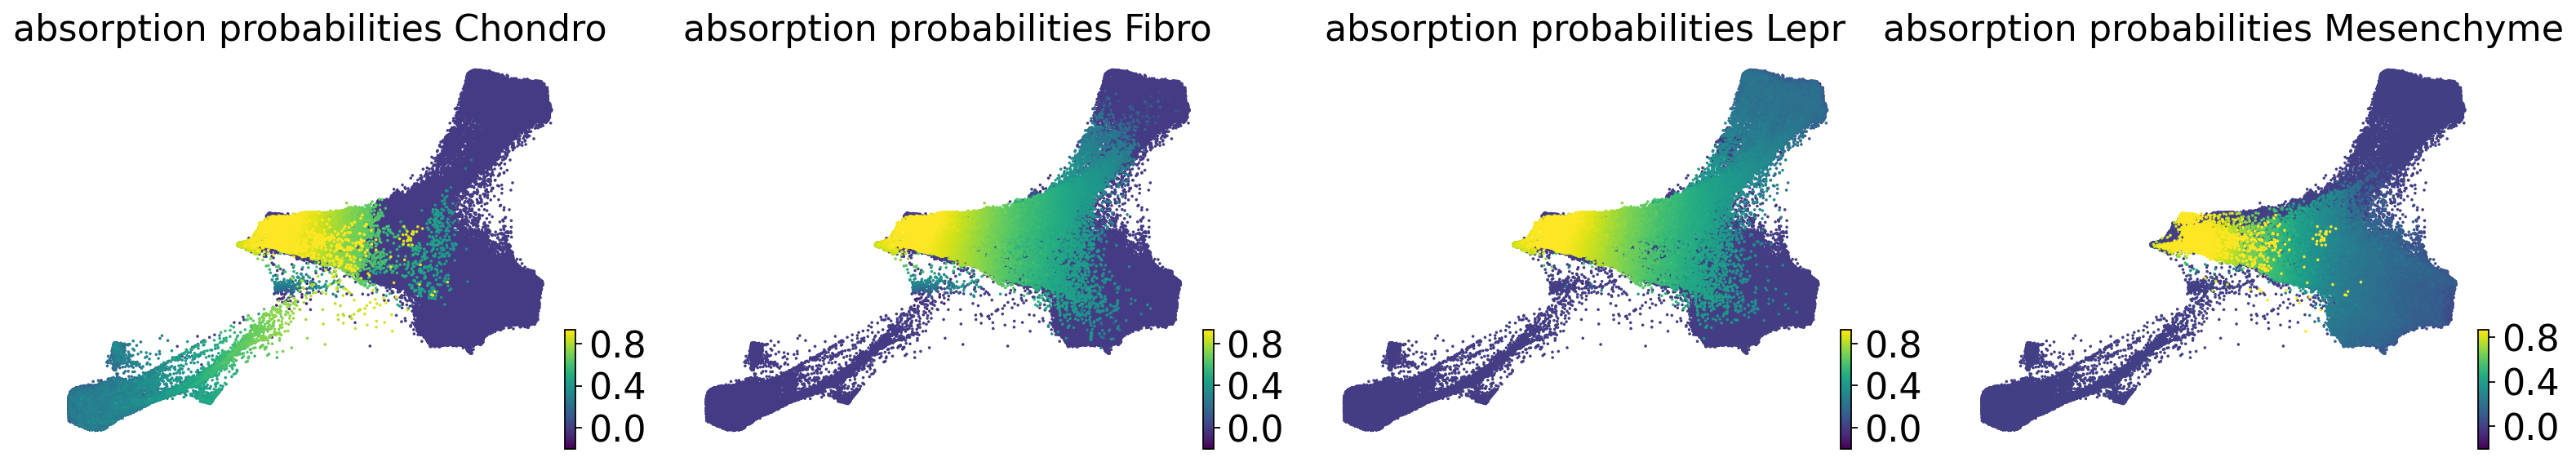

In [137]:
g_fwd.plot_absorption_probabilities(same_plot=False, basis="draw_graph_fa", perc=[0,  99],save="pseduotime_absorption.pdf")

In [122]:
osteolineage

lineage_chondro  \
Unnamed: 0                                                      
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0         0.000000   
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0         0.000000   
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0         0.000000   
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0         0.000000   
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0         0.000000   
...                                                       ...   
TTTGACTGTATTTCCT-1_5-1-2                             0.000000   
TTTGACTGTTGCATTG-1_5-1-2                             0.000000   
TTTGACTTCTTGGGCG-1_5-1-2                             0.620820   
TTTGGAGCAGCGACAA-1_5-1-2                             0.923122   
TTTGGTTCACTACTTT-1_5-1-2                             0.756314   

                                              lineage_laFibro  lineage_lepr  \
Unnamed: 0                                                                    
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0         0.000000      0.000000   
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0         0.000000      0.000000   
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0         0.000000      0.000000   
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0         0.000000      0.000000   
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0         0.000000      0.000000   
...                                                       ...           ...   
TTTGACTGTATTTCCT-1_5-1-2                             0.506887      0.506887   
TTTGACTGTTGCATTG-1_5-1-2                             0.456261      0.456261   
TTTGACTTCTTGGGCG-1_5-1-2                             0.000000      0.000000   
TTTGGAGCAGCGACAA-1_5-1-2                             0.923122      0.923122   
TTTGGTTCACTACTTT-1_5-1-2                             0.756314      0.756314   

                                              lineage_mesenchyme  
Unnamed: 0                                                        
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0            0.171657  
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0            0.595965  
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0            0.639239  
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0            0.319705  
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0            0.267906  
...                                                          ...  
TTTGACTGTATTTCCT-1_5-1-2                                0.000000  
TTTGACTGTTGCATTG-1_5-1-2                                0.000000  
TTTGACTTCTTGGGCG-1_5-1-2                                0.000000  
TTTGGAGCAGCGACAA-1_5-1-2                                0.000000  
TTTGGTTCACTACTTT-1_5-1-2                                0.000000  

[166144 rows x 4 columns]

In [118]:
g_fwd.absorption_probabilities

lineage_chondro  \
Unnamed: 0                                                      
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0         0.000000   
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0         0.000000   
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0         0.000000   
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0         0.000000   
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0         0.000000   
...                                                       ...   
TTTGACTGTATTTCCT-1_5-1-2                             0.000000   
TTTGACTGTTGCATTG-1_5-1-2                             0.000000   
TTTGACTTCTTGGGCG-1_5-1-2                             0.620820   
TTTGGAGCAGCGACAA-1_5-1-2                             0.923122   
TTTGGTTCACTACTTT-1_5-1-2                             0.756314   

                                              lineage_laFibro  lineage_lepr  \
Unnamed: 0                                                                    
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0         0.000000      0.000000   
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0         0.000000      0.000000   
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0         0.000000      0.000000   
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0         0.000000      0.000000   
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0         0.000000      0.000000   
...                                                       ...           ...   
TTTGACTGTATTTCCT-1_5-1-2                             0.506887      0.506887   
TTTGACTGTTGCATTG-1_5-1-2                             0.456261      0.456261   
TTTGACTTCTTGGGCG-1_5-1-2                             0.000000      0.000000   
TTTGGAGCAGCGACAA-1_5-1-2                             0.923122      0.923122   
TTTGGTTCACTACTTT-1_5-1-2                             0.756314      0.756314   

                                              lineage_mesenchyme  
Unnamed: 0                                                        
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0            0.171657  
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0            0.595965  
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0            0.639239  
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0            0.319705  
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0            0.267906  
...                                                          ...  
TTTGACTGTATTTCCT-1_5-1-2                                0.000000  
TTTGACTGTTGCATTG-1_5-1-2                                0.000000  
TTTGACTTCTTGGGCG-1_5-1-2                                0.000000  
TTTGGAGCAGCGACAA-1_5-1-2                                0.000000  
TTTGGTTCACTACTTT-1_5-1-2                                0.000000  

[166144 rows x 4 columns]

Computing trends using `1` core(s)


  0%|          | 0/1 [00:00<?, ?gene/s]

[0]PETSC ERROR: free(): invalid pointer
[gilberthan-WD12:3118687] *** Process received signal ***
[gilberthan-WD12:3118687] Signal: Aborted (6)
[gilberthan-WD12:3118687] Signal code:  (-6)
[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 11 SEGV: Segmentation Violation, probably memory access out of range
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.
[0]PETSC ERROR: Run with -malloc_debug to check if memory corruption is causing the crash.
[gilberthan-WD12:3118687] [ 0] /lib/x86_64-linux-gnu/libc.so.6(+0x42520)[0x7f32a6c42520]
[gilberthan-WD12:3118687] [ 1] /lib/x86_64-linux-gnu/libc.so.6(pthread_kill+0x12c)[0x7f32a6c96a7c]
[gilberthan-WD12:3118687] [ 2]

    Finish (0:00:04)
Plotting trends


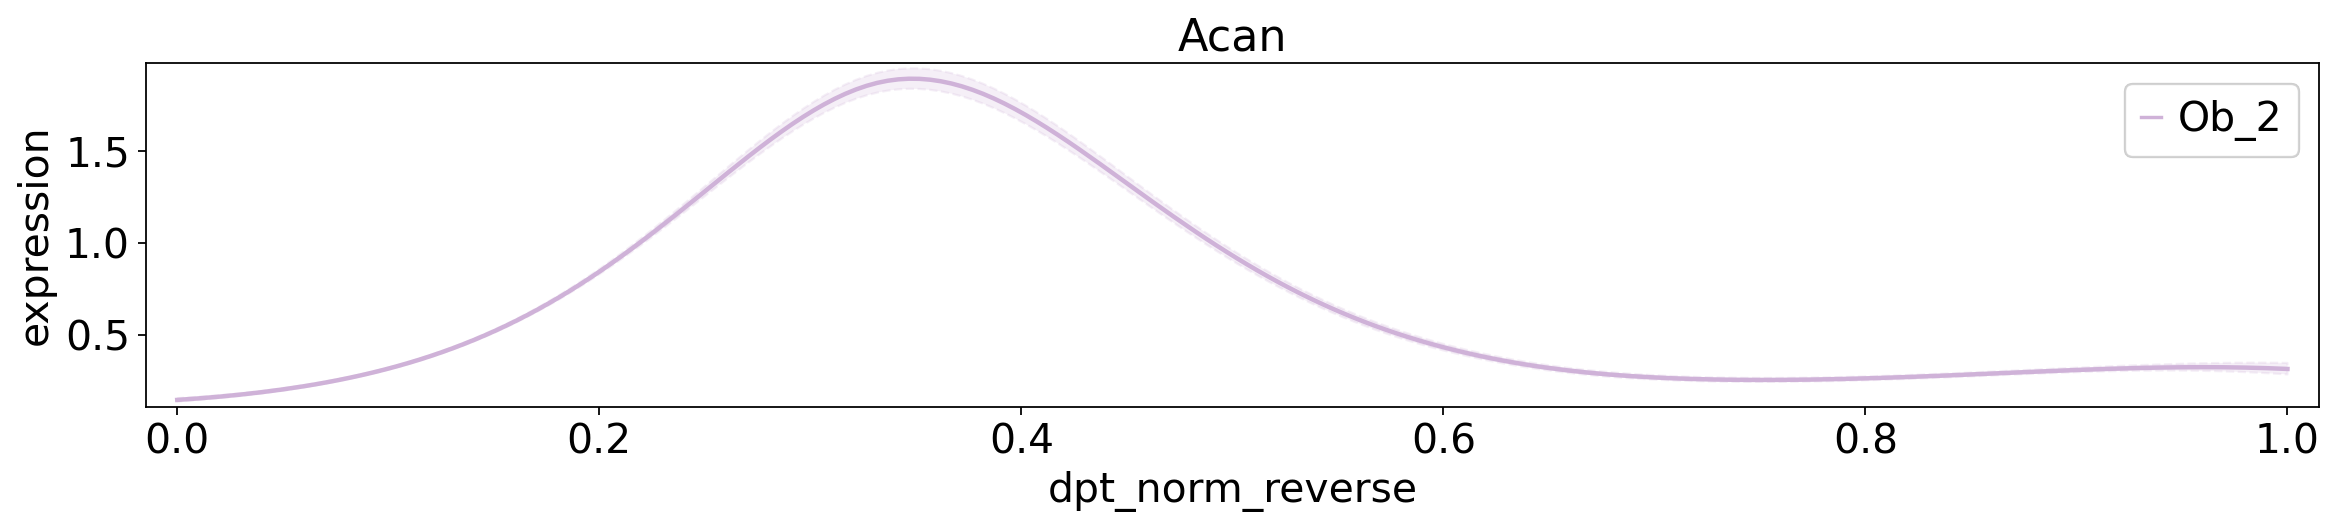

In [43]:
model = cr.models.GAM(adata_sub)
cr.pl.gene_trends(
    adata_sub,
    model=model,
    data_key="X",
    genes=["Acan"],
    ncols=3,
    time_key="dpt_norm_reverse",
    same_plot=True,
    hide_cells=True,
    figsize=(15, 4),
    n_test_points=200,n_jobs=-1,
)

In [208]:
lineage_meta=pd.read_csv("../../important_processed_data/6.22_lineageMeta.csv",index_col=0)

In [209]:
lineage_meta=lineage_meta.astype(int)

In [210]:
lineage_meta=lineage_meta.loc[adata_sub.obs_names]

In [211]:
np.array(adata_sub.obs["dpt_norm_reverse"].values)

array([0.17165709, 0.59596533, 0.63923851, ..., 0.6208204 , 0.92312241,
       0.75631408])

In [212]:
lineage_meta.mul(np.array(adata_sub.obs["dpt_norm_reverse"].values),axis=0)

lineage_chondro  \
Unnamed: 0                                                      
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0          0.00000   
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0          0.00000   
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0          0.00000   
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0          0.00000   
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0          0.00000   
...                                                       ...   
TTTGACTGTATTTCCT-1_5-1-2                              0.00000   
TTTGACTGTTGCATTG-1_5-1-2                              0.00000   
TTTGACTTCTTGGGCG-1_5-1-2                              0.62082   
TTTGGAGCAGCGACAA-1_5-1-2                              0.00000   
TTTGGTTCACTACTTT-1_5-1-2                              0.00000   

                                              lineage_laFibro  lineage_lepr  \
Unnamed: 0                                                                    
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0         0.000000           0.0   
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0         0.000000           0.0   
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0         0.000000           0.0   
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0         0.000000           0.0   
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0         0.000000           0.0   
...                                                       ...           ...   
TTTGACTGTATTTCCT-1_5-1-2                             0.000000           0.0   
TTTGACTGTTGCATTG-1_5-1-2                             0.000000           0.0   
TTTGACTTCTTGGGCG-1_5-1-2                             0.000000           0.0   
TTTGGAGCAGCGACAA-1_5-1-2                             0.923122           0.0   
TTTGGTTCACTACTTT-1_5-1-2                             0.756314           0.0   

                                              lineage_mesenchyme  
Unnamed: 0                                                        
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0            0.171657  
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0            0.595965  
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0            0.639239  
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0            0.319705  
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0            0.267906  
...                                                          ...  
TTTGACTGTATTTCCT-1_5-1-2                                0.000000  
TTTGACTGTTGCATTG-1_5-1-2                                0.000000  
TTTGACTTCTTGGGCG-1_5-1-2                                0.000000  
TTTGGAGCAGCGACAA-1_5-1-2                                0.000000  
TTTGGTTCACTACTTT-1_5-1-2                                0.000000  

[166144 rows x 4 columns]

In [213]:
pd.DataFrame(adata_sub.obs["dpt_norm_reverse"]).values.transpose()

array([[0.17165709, 0.59596533, 0.63923851, ..., 0.6208204 , 0.92312241,
        0.75631408]])

In [214]:
osteolineage=lineage_meta.mul(np.array(adata_sub.obs["dpt_norm_reverse"].values),axis=0)

In [215]:
methodLineage=cr._utils.Lineage(np.array(osteolineage), names=["Chondro","Fibro","Lepr","Mesenchyme"])

In [340]:
adata_sub.obsm["to_terminal_states"]=methodLineage

Computing trends using `1` core(s)


  0%|          | 0/1 [00:00<?, ?gene/s]

    Finish (0:00:21)
Plotting trends


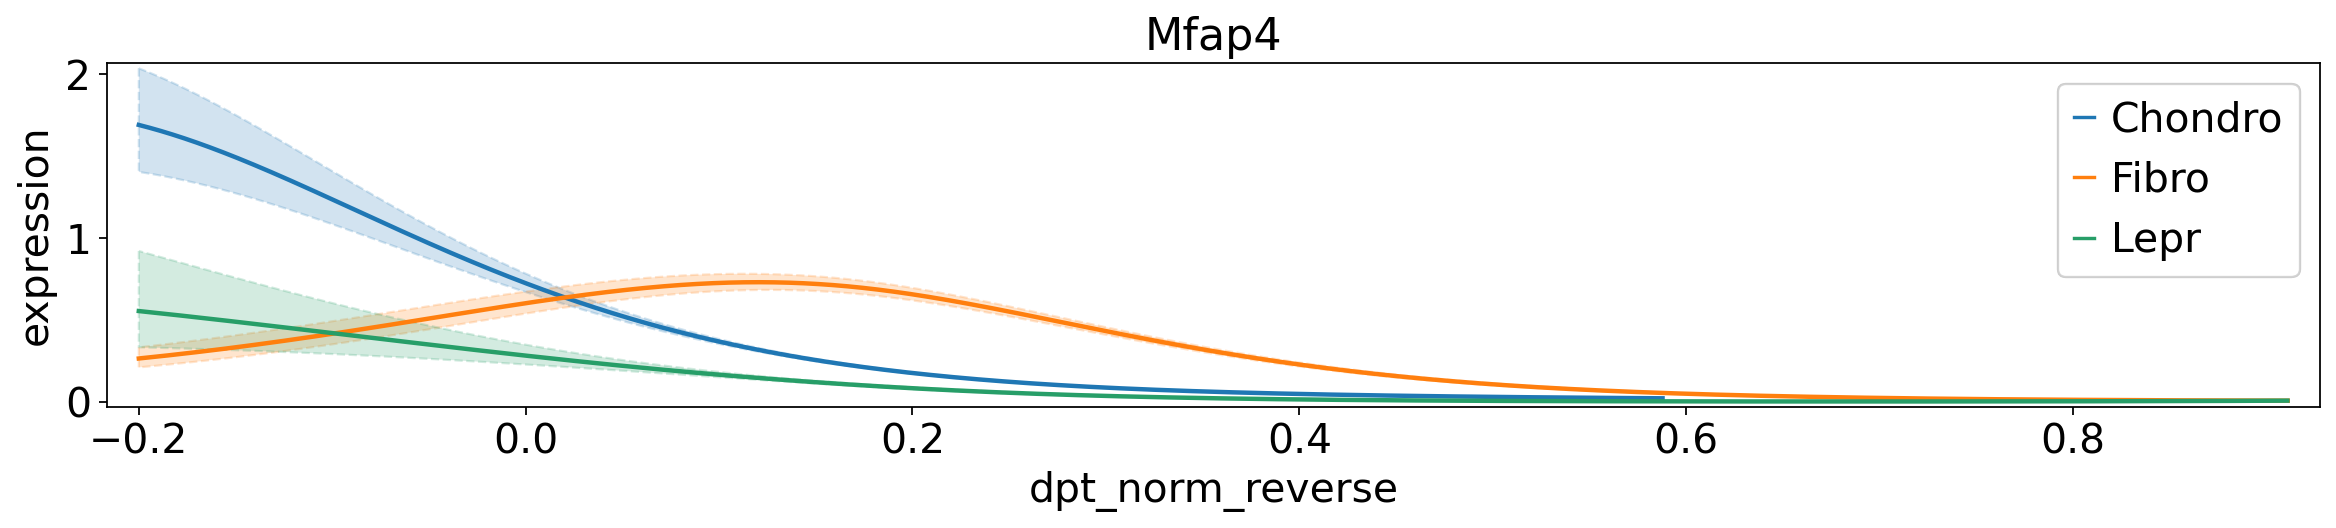

In [217]:
model = cr.models.GAM(adata_sub)
cr.pl.gene_trends(
    adata_sub,
    model=model,
    data_key="X",
    genes=["Mfap4"],
    ncols=3,
    time_key="dpt_norm_reverse",
    same_plot=True,
    hide_cells=True,
    figsize=(15, 4),
    n_test_points=200000,n_jobs=-1,
)

Computing trends using `1` core(s)


  0%|          | 0/1 [00:00<?, ?gene/s]

    Finish (0:00:23)
Plotting trends


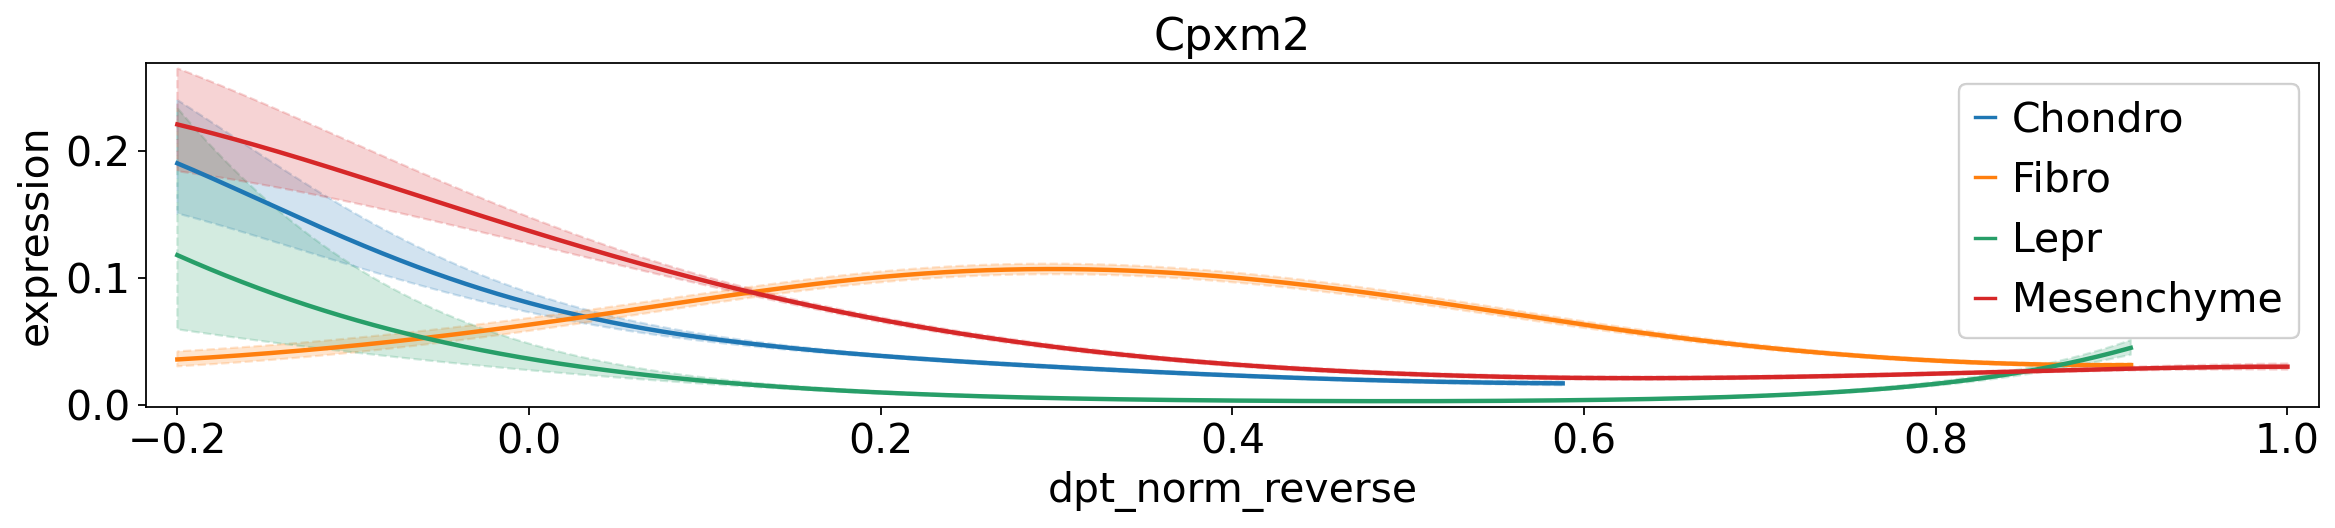

In [228]:
model = cr.models.GAM(adata_sub)
cr.pl.gene_trends(
    adata_sub,
    model=model,
    data_key="X",
    genes=["Cpxm2"],
    ncols=3,
    time_key="dpt_norm_reverse",
    same_plot=True,
    hide_cells=True,
    figsize=(15, 4),
    n_test_points=200000,n_jobs=-1,
)

Computing trends using `1` core(s)


  0%|          | 0/1 [00:00<?, ?gene/s]

[0]PETSC ERROR: 

    Finish (0:00:13)
Plotting trends


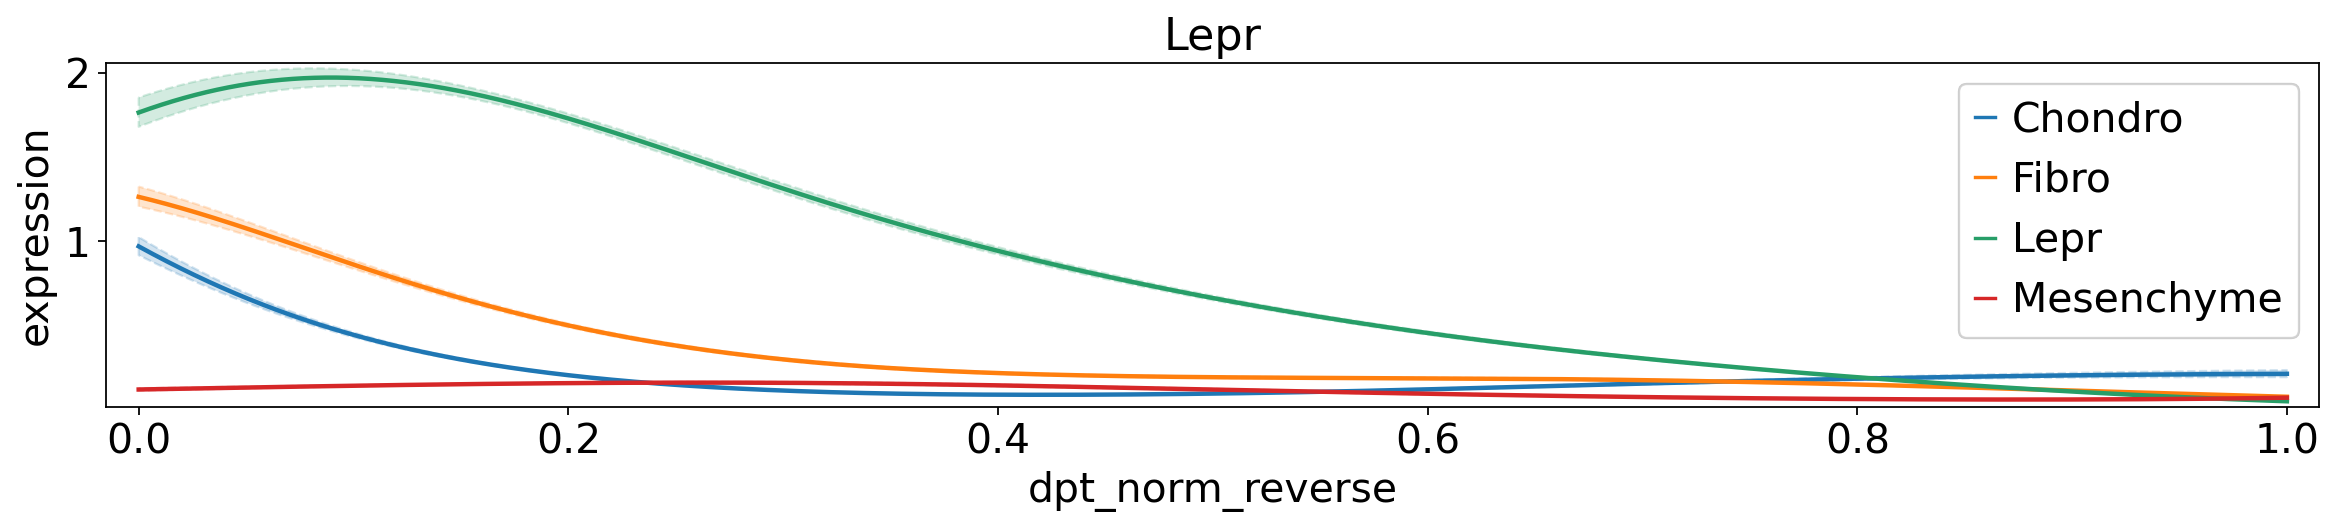

In [314]:
cr.pl.gene_trends(
    adata_sub,
    model=model,
    data_key="X",
    genes=["Lepr"],
    ncols=3,
    time_key="dpt_norm_reverse",
    same_plot=True,
    hide_cells=True,
    figsize=(15, 4),
    n_test_points=20000,n_jobs=-1,time_range=(0,1)
)

Computing trends using `1` core(s)


  0%|          | 0/1 [00:00<?, ?gene/s]

    Finish (0:00:16)
Plotting trends


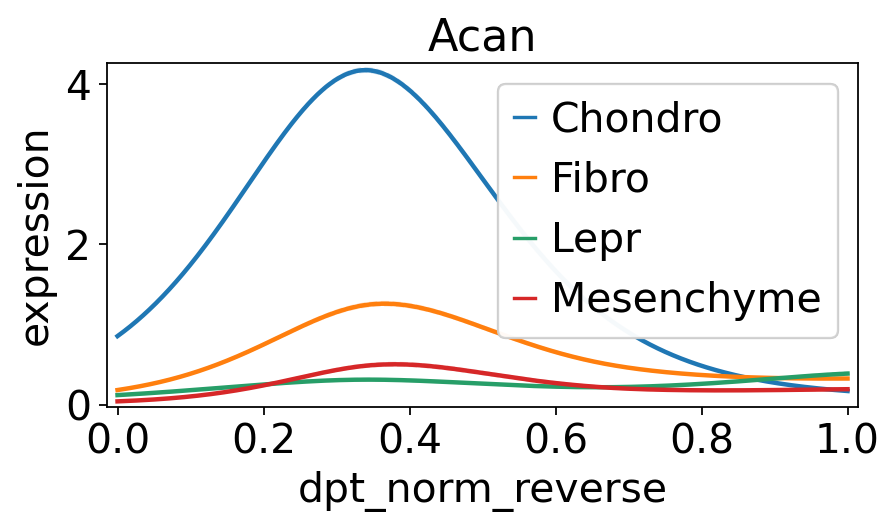

In [312]:
cr.pl.gene_trends(
    adata_sub,
    model=model,
    data_key="X",
    genes=["Acan"],
    ncols=3,
    time_key="dpt_norm_reverse",
    same_plot=True,
    hide_cells=True,
    n_test_points=20000,n_jobs=-1,time_range=(0,1)
)

Computing trends using `1` core(s)


  0%|          | 0/1 [00:00<?, ?gene/s]

    Finish (0:00:08)
Plotting trends


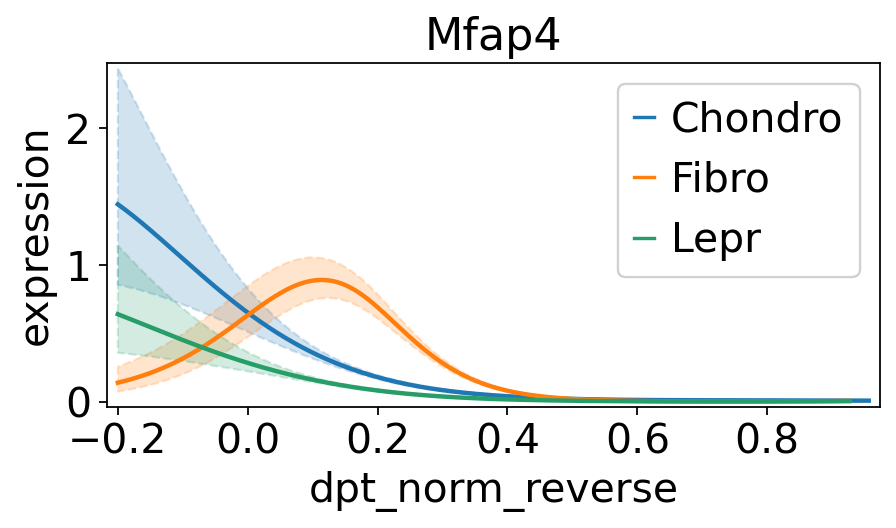

In [99]:
cr.pl.gene_trends(
    adata_sub,
    model=model,
    data_key="X",
    genes=["Mfap4"],
    ncols=3,
    time_key="dpt_norm_reverse",
    same_plot=True,
    hide_cells=True,
    n_test_points=20000,n_jobs=-1,
)

Computing trends using `1` core(s)


  0%|          | 0/1 [00:00<?, ?gene/s]

    Finish (0:00:11)
Plotting trends


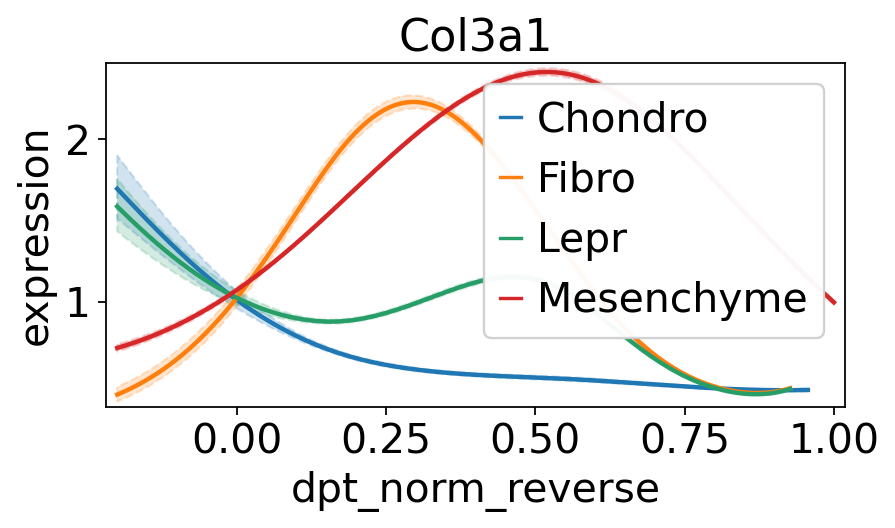

In [136]:
cr.pl.gene_trends(
    adata_sub,
    model=model,
    data_key="X",
    genes=["Col3a1"],
    ncols=3,
    time_key="dpt_norm_reverse",
    same_plot=True,
    hide_cells=True,
    n_test_points=20000,n_jobs=-1,
)

In [123]:
g_fwd._absorption_probabilities=methodLineage

In [124]:
g_fwd.absorption_probabilities

Lineage([[0.        , 0.        , 0.        , 0.17165709],
         [0.        , 0.        , 0.        , 0.59596533],
         [0.        , 0.        , 0.        , 0.63923851],
         ...,
         [0.6208204 , 0.        , 0.        , 0.        ],
         [0.92312241, 0.92312241, 0.92312241, 0.        ],
         [0.75631408, 0.75631408, 0.75631408, 0.        ]],
  names([Chondro, Fibro, Lepr, Mesenchyme]))

In [341]:
g_fwd.compute_lineage_drivers()

Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:01:04)


Chondro_corr  Chondro_pval  Chondro_qval  Chondro_ci_low  \
Acan             0.702379           0.0           0.0        0.699934   
Col10a1          0.696858           0.0           0.0        0.694377   
Hapln1           0.694112           0.0           0.0        0.691612   
Col9a3           0.679299           0.0           0.0        0.676701   
Col9a2           0.677523           0.0           0.0        0.674913   
...                   ...           ...           ...             ...   
tg-LacZ               NaN           NaN           NaN             NaN   
tg-MCherry            NaN           NaN           NaN             NaN   
tg-beta-lac           NaN           NaN           NaN             NaN   
tg-tdTom              NaN           NaN           NaN             NaN   
z                     NaN           NaN           NaN             NaN   

             Chondro_ci_high  Fibro_corr    Fibro_pval    Fibro_qval  \
Acan                0.704807   -0.014768  1.745828e-09  7.292410e-09   
Col10a1             0.699323    0.004495  6.690156e-02  1.385252e-01   
Hapln1              0.696596   -0.021244  4.698946e-18  2.694002e-17   
Col9a3              0.681881   -0.021625  1.187398e-18  6.938061e-18   
Col9a2              0.680116   -0.024313  3.683785e-23  2.436188e-22   
...                      ...         ...           ...           ...   
tg-LacZ                  NaN         NaN           NaN           NaN   
tg-MCherry               NaN         NaN           NaN           NaN   
tg-beta-lac              NaN         NaN           NaN           NaN   
tg-tdTom                 NaN         NaN           NaN           NaN   
z                        NaN         NaN           NaN           NaN   

             Fibro_ci_low  Fibro_ci_high  Lepr_corr     Lepr_pval  \
Acan            -0.019575      -0.009960  -0.153837  0.000000e+00   
Col10a1         -0.000313       0.009304  -0.040142  3.096203e-60   
Hapln1          -0.026050      -0.016437  -0.132069  0.000000e+00   
Col9a3          -0.026431      -0.016818  -0.126538  0.000000e+00   
Col9a2          -0.029119      -0.019507  -0.138070  0.000000e+00   
...                   ...            ...        ...           ...   
tg-LacZ               NaN            NaN        NaN           NaN   
tg-MCherry            NaN            NaN        NaN           NaN   
tg-beta-lac           NaN            NaN        NaN           NaN   
tg-tdTom              NaN            NaN        NaN           NaN   
z                     NaN            NaN        NaN           NaN   

                Lepr_qval  Lepr_ci_low  Lepr_ci_high  Mesenchyme_corr  \
Acan         0.000000e+00    -0.158528     -0.149139        -0.196669   
Col10a1      1.451732e-59    -0.044941     -0.035340        -0.157953   
Hapln1       0.000000e+00    -0.136790     -0.127341        -0.204331   
Col9a3       0.000000e+00    -0.131267     -0.121804        -0.214261   
Col9a2       0.000000e+00    -0.142783     -0.133350        -0.212460   
...                   ...          ...           ...              ...   
tg-LacZ               NaN          NaN           NaN              NaN   
tg-MCherry            NaN          NaN           NaN              NaN   
tg-beta-lac           NaN          NaN           NaN              NaN   
tg-tdTom              NaN          NaN           NaN              NaN   
z                     NaN          NaN           NaN              NaN   

             Mesenchyme_pval  Mesenchyme_qval  Mesenchyme_ci_low  \
Acan                     0.0              0.0          -0.201287   
Col10a1                  0.0              0.0          -0.162638   
Hapln1                   0.0              0.0          -0.208934   
Col9a3                   0.0              0.0          -0.218844   
Col9a2                   0.0              0.0          -0.217047   
...                      ...              ...                ...   
tg-LacZ                  NaN              NaN                NaN   
tg-MCherry           

In [342]:
adata_sub.varm['terminal_lineage_drivers'].to_csv("../result/6.21_traj_hm/terminal_driver2.csv")

In [128]:
g_fwd.lineage_drivers.sort_values("Fibro_corr", ascending=False)

Chondro_corr  Chondro_pval  Chondro_qval  Chondro_ci_low  \
Car3             0.728699           0.0           0.0        0.726436   
Col1a1           0.598408           0.0           0.0        0.595312   
Col1a2           0.571454           0.0           0.0        0.568207   
Slc36a2          0.595417           0.0           0.0        0.592304   
Col22a1          0.730585           0.0           0.0        0.728335   
...                   ...           ...           ...             ...   
tg-LacZ               NaN           NaN           NaN             NaN   
tg-MCherry            NaN           NaN           NaN             NaN   
tg-beta-lac           NaN           NaN           NaN             NaN   
tg-tdTom              NaN           NaN           NaN             NaN   
z                     NaN           NaN           NaN             NaN   

             Chondro_ci_high  Fibro_corr  Fibro_pval  Fibro_qval  \
Car3                0.730947    0.790119         0.0         0.0   
Col1a1              0.601485    0.725535         0.0         0.0   
Col1a2              0.574684    0.710216         0.0         0.0   
Slc36a2             0.598512    0.705049         0.0         0.0   
Col22a1             0.732819    0.705001         0.0         0.0   
...                      ...         ...         ...         ...   
tg-LacZ                  NaN         NaN         NaN         NaN   
tg-MCherry               NaN         NaN         NaN         NaN   
tg-beta-lac              NaN         NaN         NaN         NaN   
tg-tdTom                 NaN         NaN         NaN         NaN   
z                        NaN         NaN         NaN         NaN   

             Fibro_ci_low  Fibro_ci_high  Lepr_corr  Lepr_pval  Lepr_qval  \
Car3             0.788306       0.791919   0.781449        0.0        0.0   
Col1a1           0.723249       0.727804   0.671826        0.0        0.0   
Col1a2           0.707825       0.712591   0.701931        0.0        0.0   
Slc36a2          0.702622       0.707459   0.702851        0.0        0.0   
Col22a1          0.702574       0.707411   0.690388        0.0        0.0   
...                   ...            ...        ...        ...        ...   
tg-LacZ               NaN            NaN        NaN        NaN        NaN   
tg-MCherry            NaN            NaN        NaN        NaN        NaN   
tg-beta-lac           NaN            NaN        NaN        NaN        NaN   
tg-tdTom              NaN            NaN        NaN        NaN        NaN   
z                     NaN            NaN        NaN        NaN        NaN   

             Lepr_ci_low  Lepr_ci_high  Mesenchyme_corr  Mesenchyme_pval  \
Car3            0.779570      0.783315        -0.003172     1.960062e-01   
Col1a1          0.669180      0.674456         0.088125    5.169816e-284   
Col1a2          0.699483      0.704362         0.010723     1.236685e-05   
Slc36a2         0.700410      0.705276         0.055356    5.891249e-113   
Col22a1         0.687863      0.692897         0.152473     0.000000e+00   
...                  ...           ...              ...              ...   
tg-LacZ              NaN           NaN              NaN              NaN   
tg-MCherry           NaN           NaN              NaN              NaN   
tg-beta-lac          NaN           NaN              NaN              NaN   
tg-tdTom             NaN           NaN              NaN              NaN   
z                    NaN           NaN              NaN              NaN   

             Mesenchyme_qval  Mesenchyme_ci_low  Mesenchyme_ci_high  
Car3            2.810036e-01          -0.007981            0.001636  
Col1a1         8.947971e-283           0.083351            0.092894  
Col1a2          2.910537e-05           0.005915            0.015531  
Slc36a2        4.794721e-112           0.050561            0.060149  
Col22a1         0.000000e+00           0.147773            0.157167  
...                      ...                ...              

In [ ]:
cr.pl.gene_trends(
    adata_sub,
    model=model,
    data_key="X",
    genes=["Acan"],
    ncols=3,
    time_key="dpt_norm_reverse",
    same_plot=True,
    hide_cells=True,
    n_test_points=20000,n_jobs=-1,
)

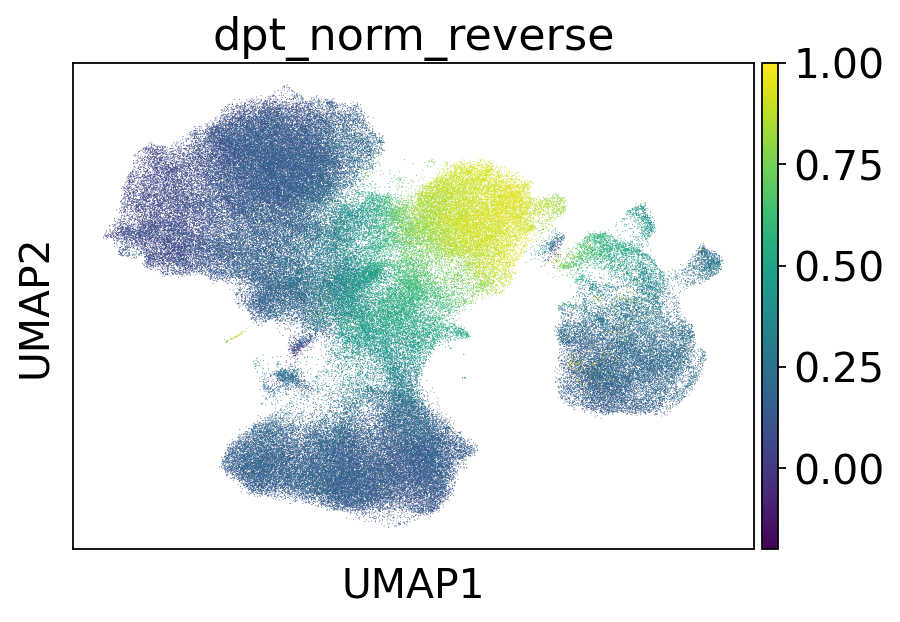

In [61]:
sc.pl.umap(adata_sub,color="dpt_norm_reverse")

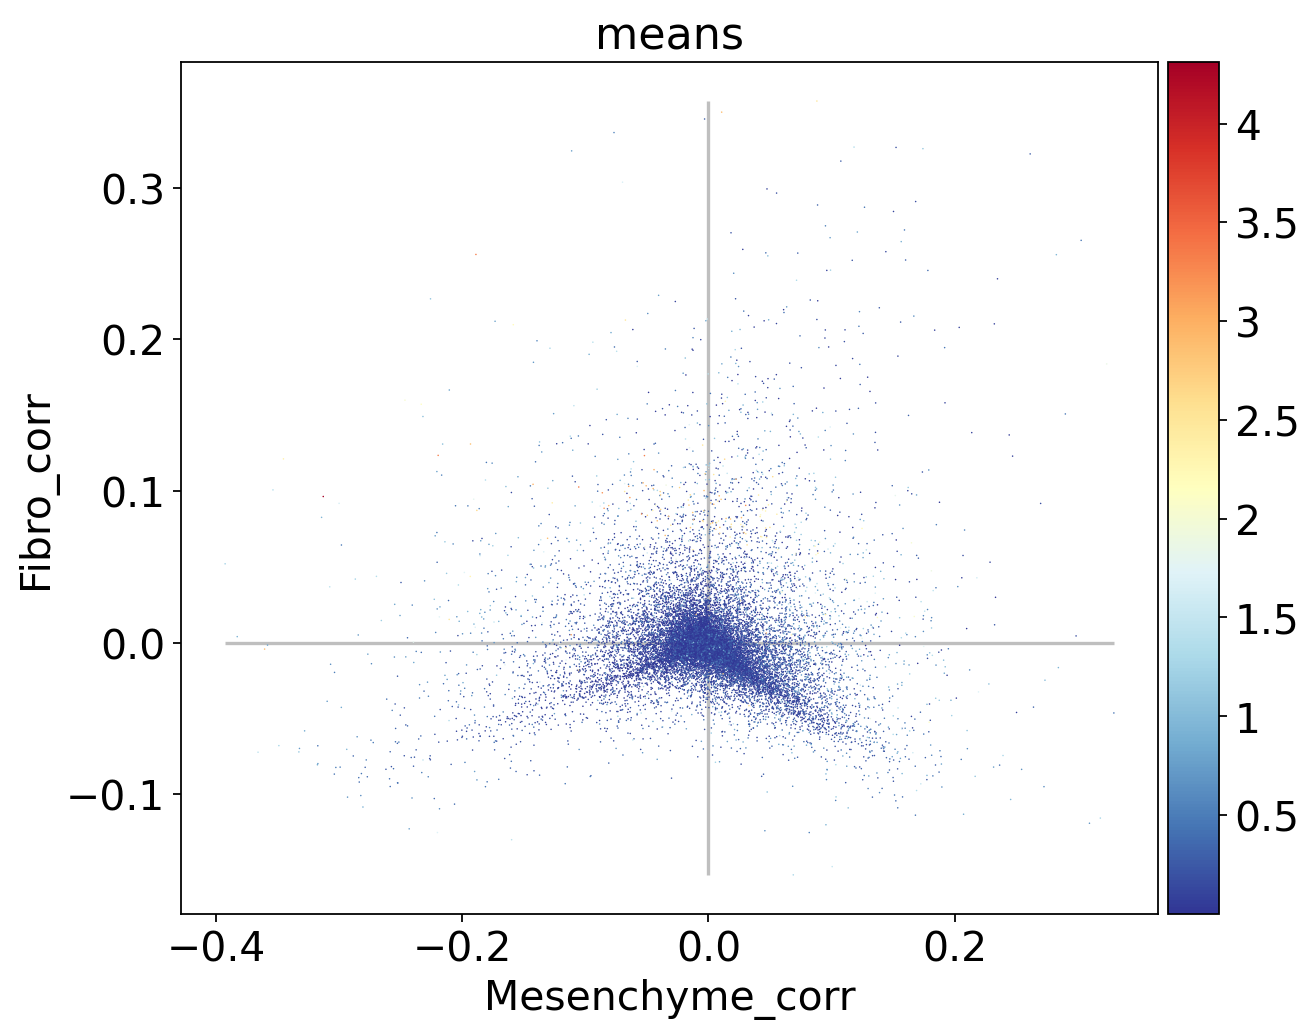

In [343]:
g_fwd.plot_lineage_drivers_correlation(
    lineage_x="Mesenchyme",
    lineage_y="Fibro",
    color="means",
    legend_loc="none",
    figsize=(7, 7),
    fontsize=20
)

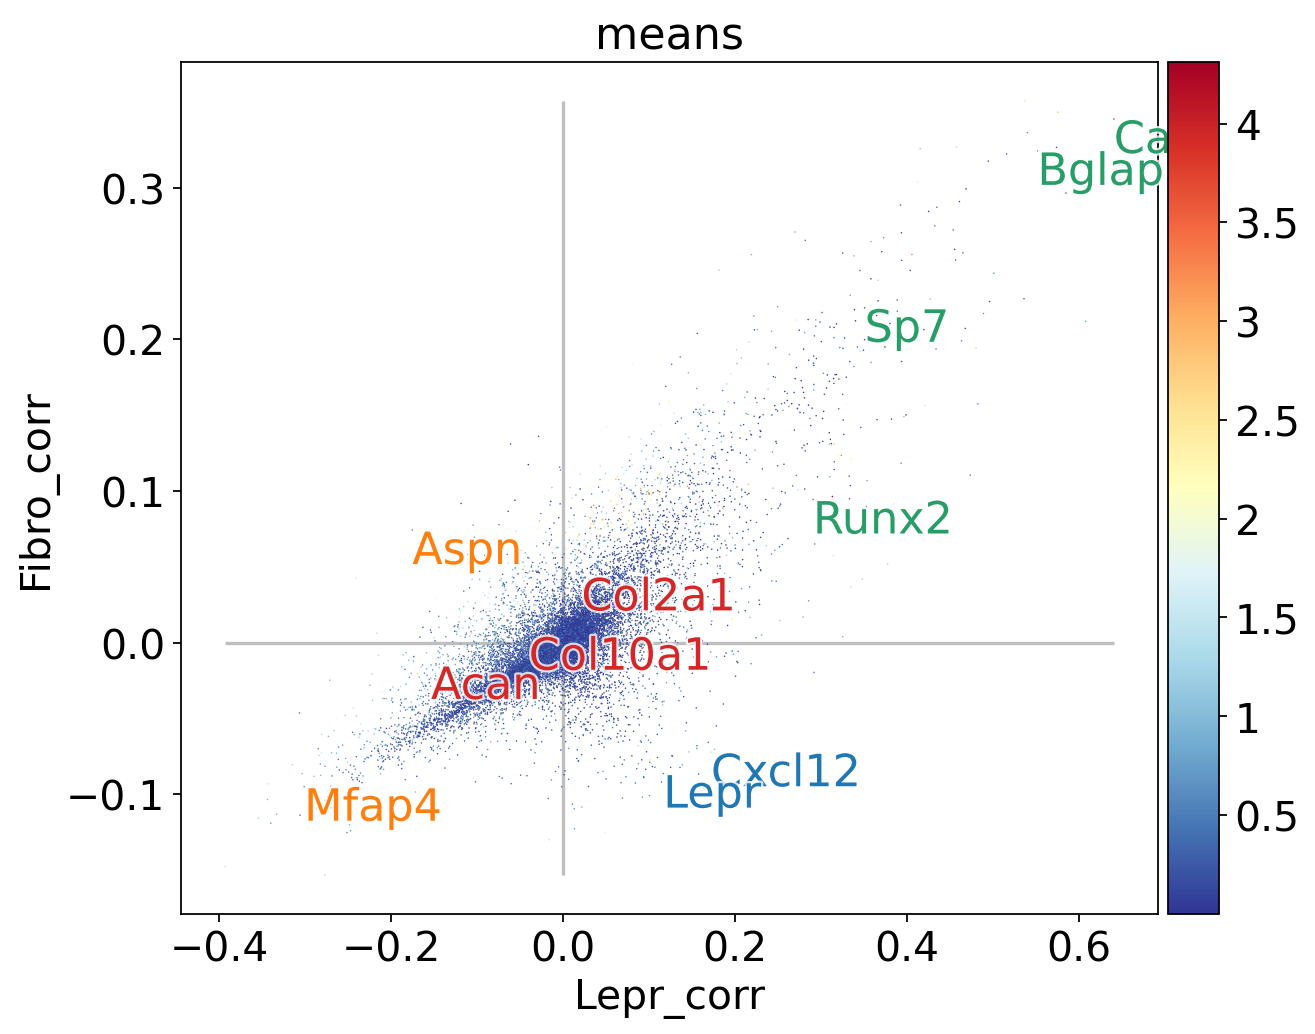

In [344]:
Osteoblast_genes = ["Runx2", "Sp7", "Car3", "Bglap"]
Chondro_genes = ["Acan","Col2a1","Col10a1"]
Fibro_genes = ["Mfap4","Cxpm2","Aspn"]
Lepr_gene=["Lepr","Cxcl12"]
genes_oi = {
    "Lepr":Lepr_gene,
    "Fibro":Fibro_genes,
    "Osteo":Osteoblast_genes,
    "Chondro":Chondro_genes
}
g_fwd.plot_lineage_drivers_correlation(
    lineage_x="Lepr",
    lineage_y="Fibro",
    color="means",gene_sets=genes_oi,
    legend_loc="none",
    figsize=(7, 7),
    fontsize=20
)

In [329]:
lineage_meta=pd.read_csv("../../important_processed_data/6.22_lineageMeta.csv",index_col=0)

In [330]:
lineage_meta=lineage_meta.loc[adata_sub.obs_names]

In [331]:
lineage_chondro_only=lineage_meta["lineage_chondro"] & ~ lineage_meta["lineage_lepr"] & ~ lineage_meta["lineage_laFibro"]
lineage_la_only=lineage_meta["lineage_laFibro"] & ~ lineage_meta["lineage_lepr"] & ~ lineage_meta["lineage_chondro"]
lineage_lepr_only=lineage_meta["lineage_lepr"] & ~ lineage_meta["lineage_laFibro"] & ~ lineage_meta["lineage_chondro"]
lineage_mes=lineage_meta["lineage_mesenchyme"]

In [332]:
lineage_only_dict={"Chondro":lineage_chondro_only,"Fibro":lineage_la_only,"Lepr":lineage_lepr_only,"Mesenchyme":lineage_mes}

In [333]:
lineage_only_df=pd.DataFrame(lineage_only_dict)

In [334]:
lineage_only_df=lineage_only_df.mul(np.array(adata_sub.obs["dpt_norm_reverse"].values),axis=0)

In [335]:
lineage_only_df[(adata_sub.obs["C19_named"]=="HC") & (adata_sub.obs["dpt_norm"]<0.25)]["Chondro"]=0


In [336]:
methodLineage=cr._utils.Lineage(np.array(lineage_only_df), names=["Chondro","Fibro","Lepr","Mesenchyme"])

In [337]:
g_fwd._absorption_probabilities=methodLineage

In [338]:
methodLineage

Lineage([[0.        , 0.        , 0.        , 0.17165709],
         [0.        , 0.        , 0.        , 0.59596533],
         [0.        , 0.        , 0.        , 0.63923851],
         ...,
         [0.6208204 , 0.        , 0.        , 0.        ],
         [0.        , 0.92312241, 0.        , 0.        ],
         [0.        , 0.75631408, 0.        , 0.        ]],
  names([Chondro, Fibro, Lepr, Mesenchyme]))

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The dra

saving figure to file /home/gilberthan/Desktop/disk1/limb/3.9_wt_integrate/result/6.21_traj_hm/scvelo_pseduotime_absorption2.pdf


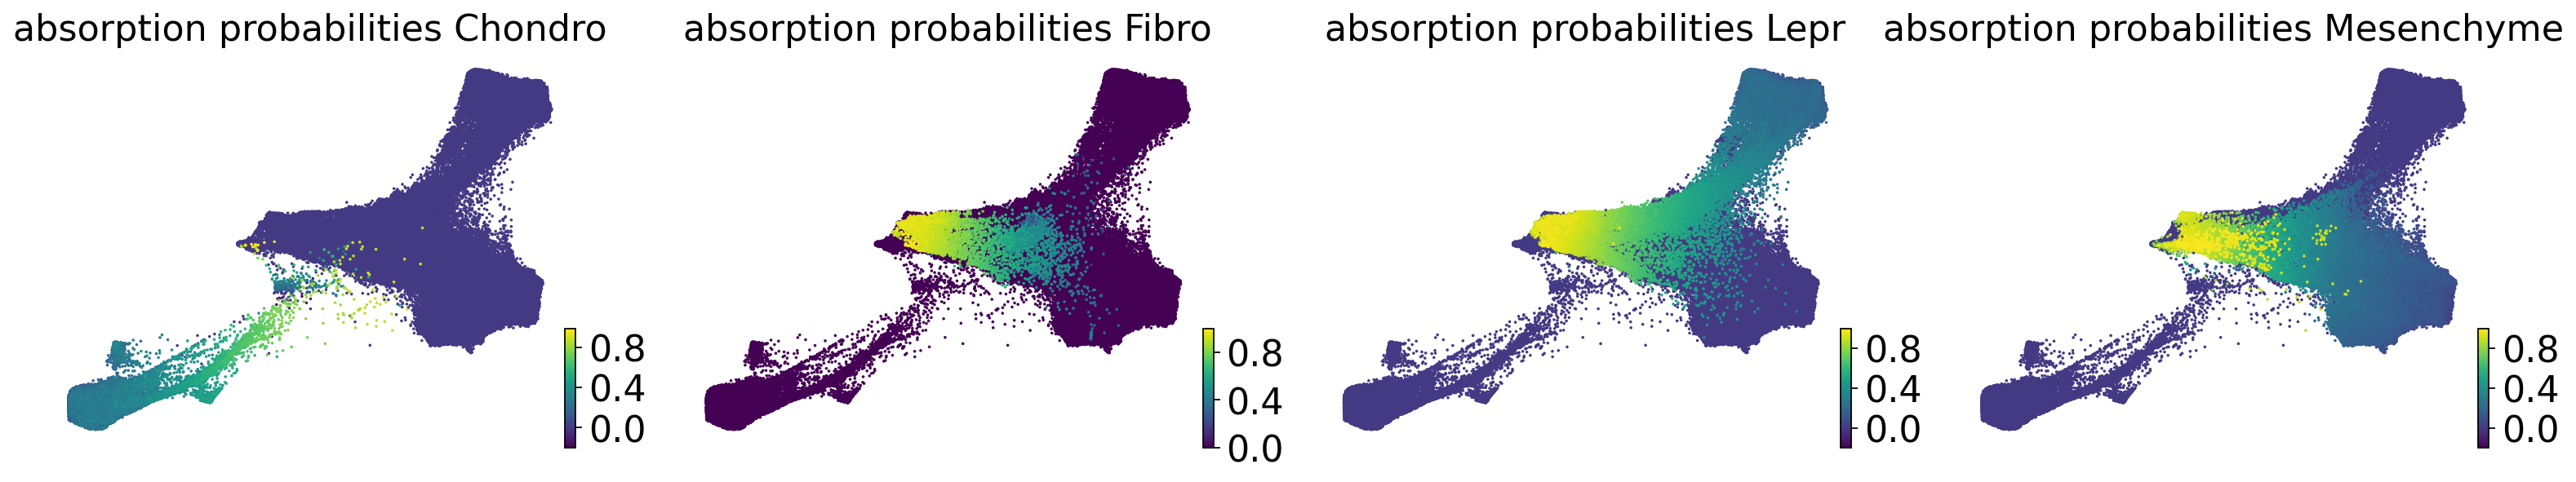

In [339]:
g_fwd.plot_absorption_probabilities(same_plot=False, basis="draw_graph_fa", perc=[0, 100],save="pseduotime_absorption2.pdf")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


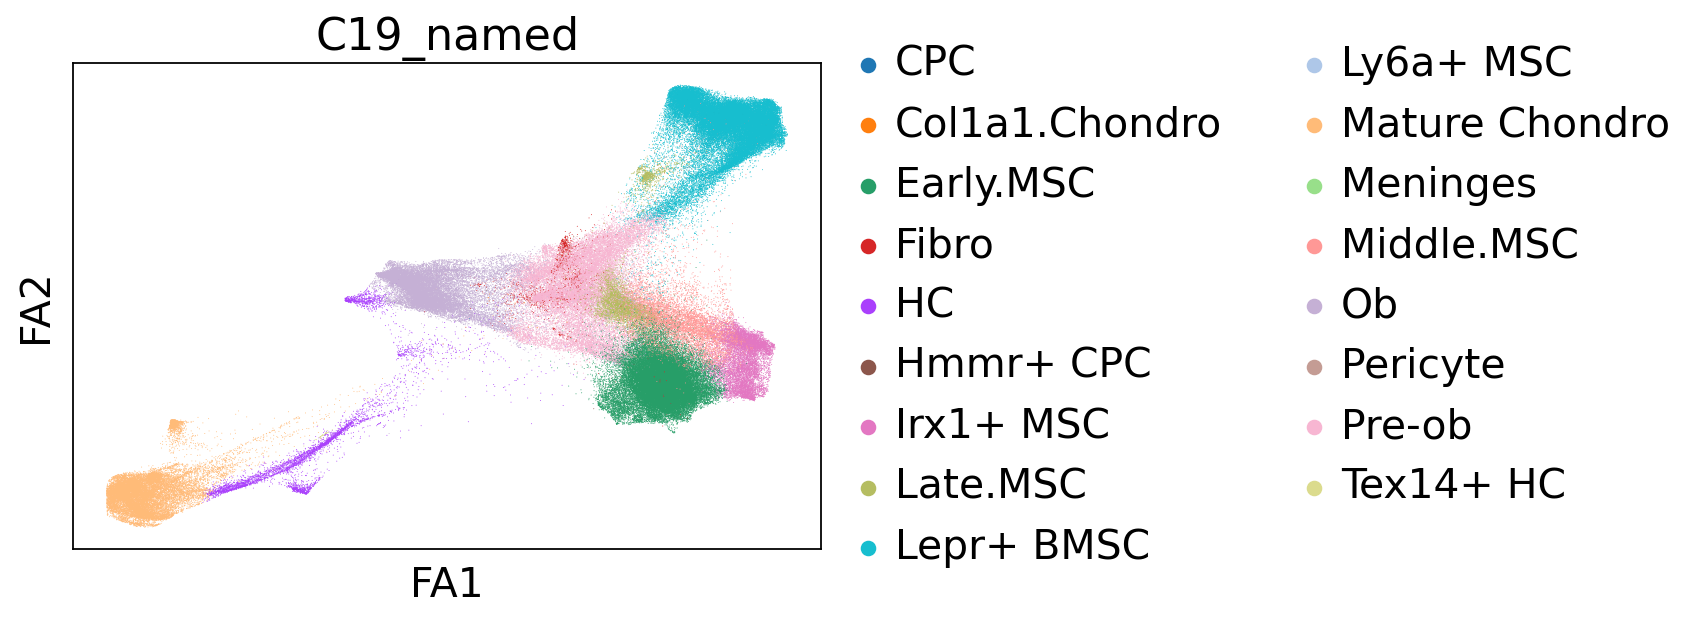

In [289]:
sc.pl.draw_graph(adata_sub,color="C19_named")

In [302]:
x=lineage_only_df[(adata_sub.obs["C19_named"]=="HC") & (adata_sub.obs["dpt_norm_reverse"]<0.25)]["Chondro"]>0


In [303]:
x.sum()

173

In [304]:
lineage_only_df["Chondro"][x.index]=0

Computing trends using `1` core(s)


  0%|          | 0/5 [00:00<?, ?gene/s]

did not converge
    Finish (0:06:24)


ValueError: Length of values (3) does not match length of index (5)

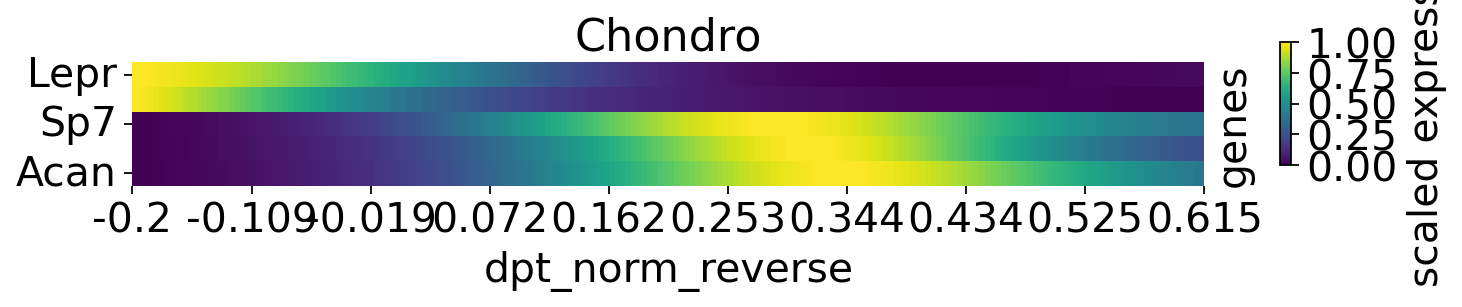

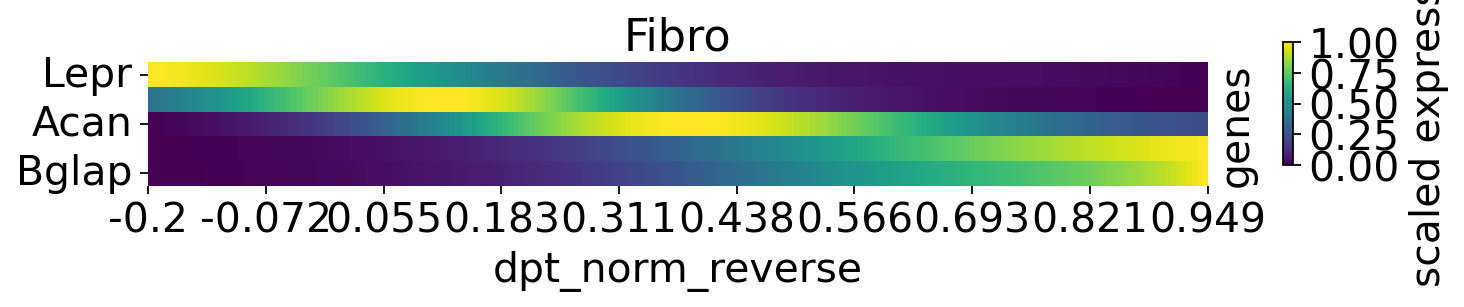

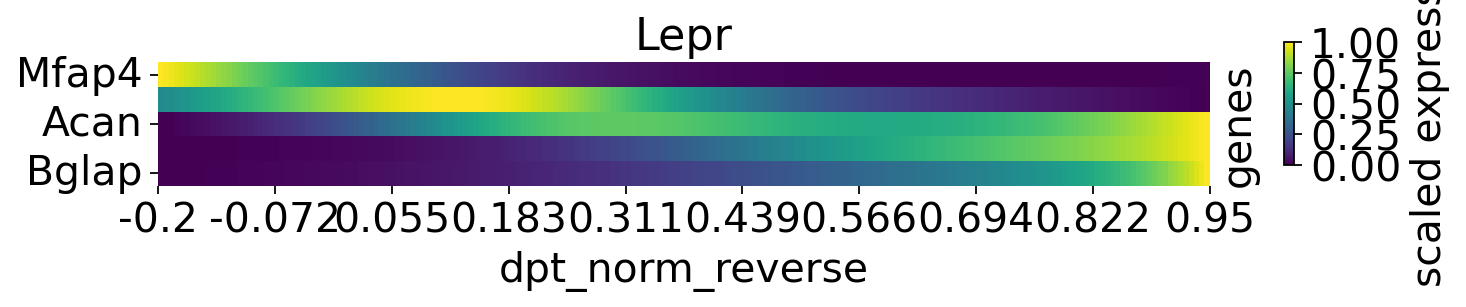

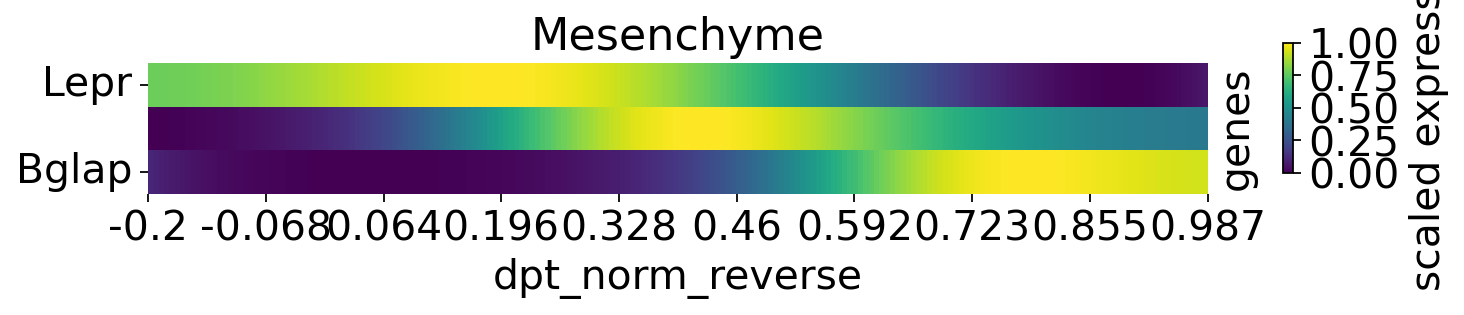

In [318]:
genes = cr.pl.heatmap(
    adata_sub,
    model,
    ["Acan","Lepr","Mfap4","Sp7","Bglap"],
    time_key="dpt_norm_reverse",
    show_absorption_probabilities=False,
    show_progress_bar=False,
    return_genes=True
)
genes

In [345]:
g_fwd.write("../processed_data/g_fwd")

Writing `GPCCA[kernel=PseudotimeKernel[n=166144], terminal_states=['Ob_2'], macrostates=['HC', 'Mature Chondro_1', 'Mature Chondro_2', 'Mature Chondro_3', 'Mature Chondro_4', 'Mature Chondro_5', 'Mature Chondro_6', 'Ob_1', 'Ob_2']]` to `../processed_data/g_fwd.pickle`


NotImplementedError: object proxy must define __reduce_ex__()